In [ ]:
from google.colab import drive
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/drive')
df_swn = pd.read_excel('/drive/My Drive/swn_cleaned.xlsx')
df_vader = pd.read_excel('/drive/My Drive/vader_cleaned.xlsx')
df_blob = pd.read_excel('/drive/My Drive/blob_cleaned.xlsx')
df_afinn = pd.read_excel('/drive/My Drive/afinn_cleaned.xlsx')

Mounted at /drive


SWN



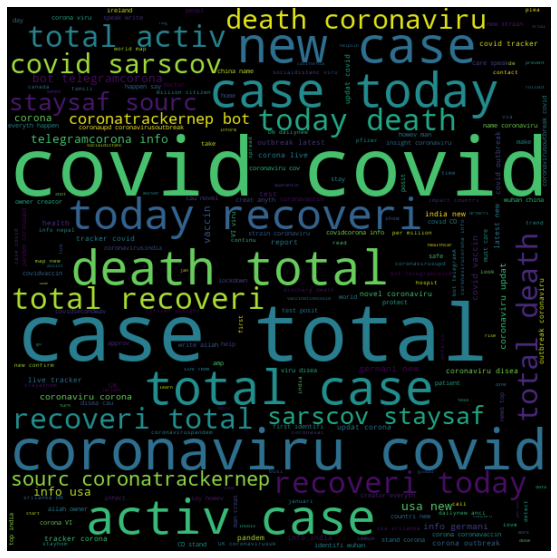

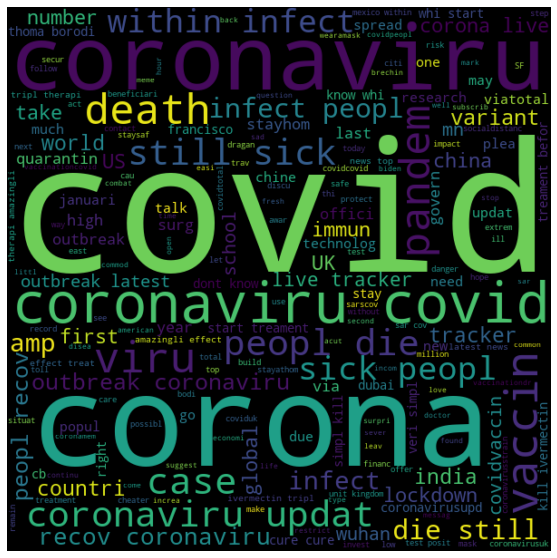

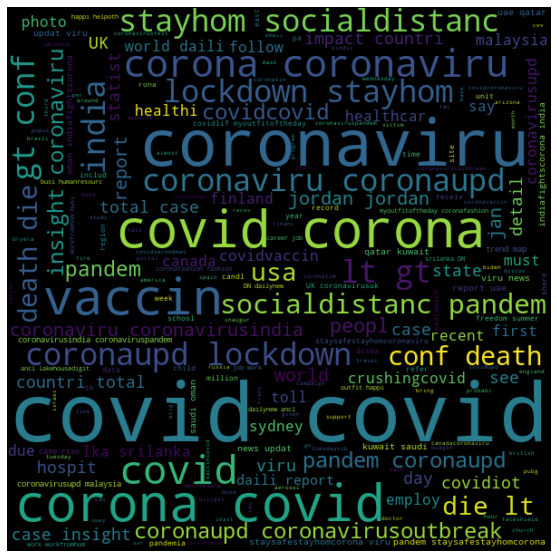

AFINN



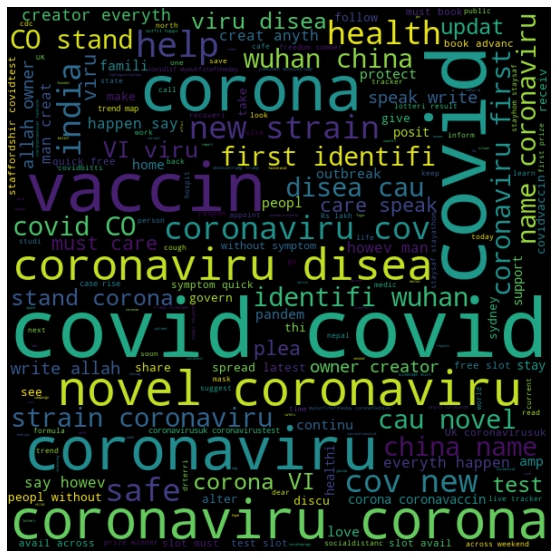

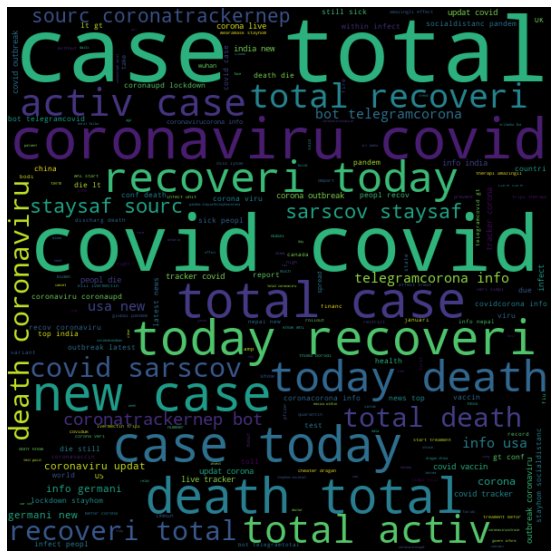

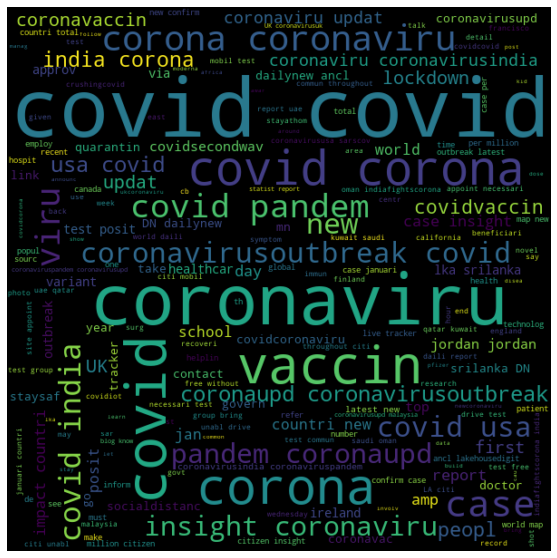

BLOB



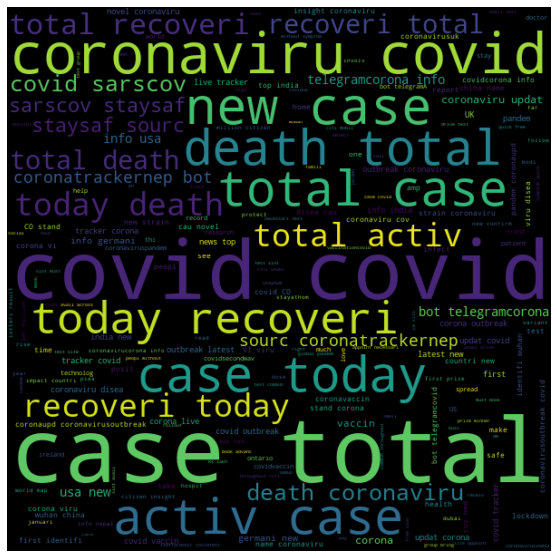

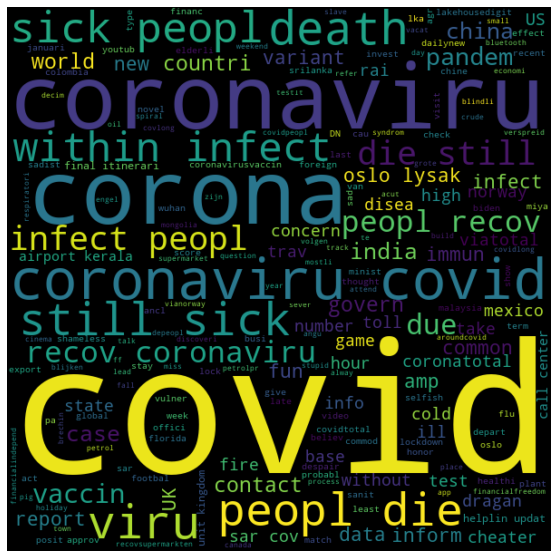

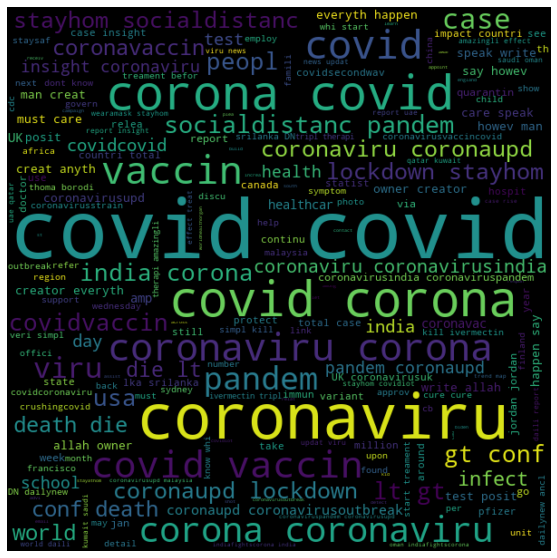

VADER



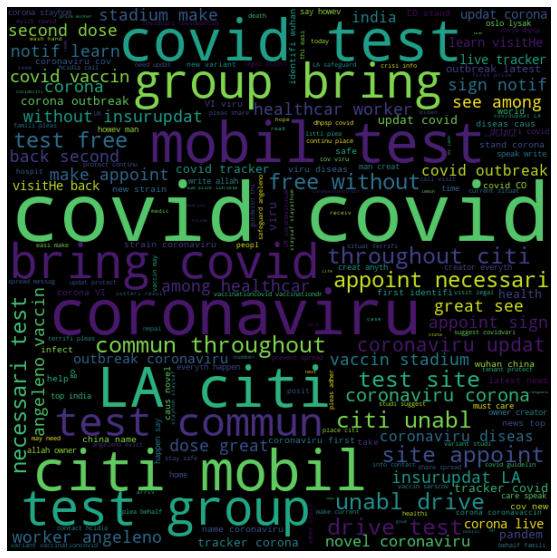

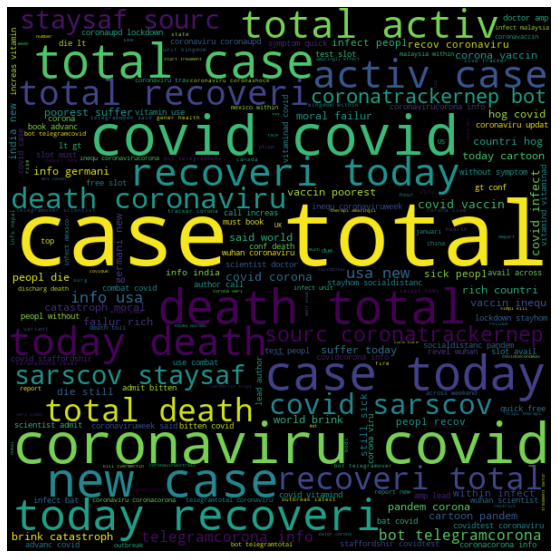

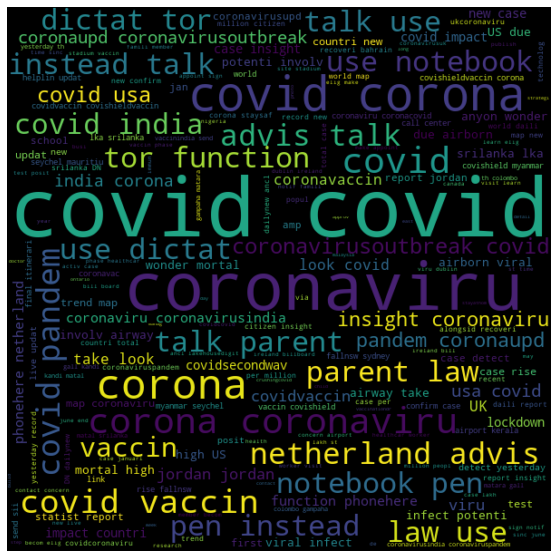

In [ ]:
pos_text_swn=""
neg_text_swn=""
neut_text_swn=""

pos_text_blob=""
neg_text_blob=""
neut_text_blob=""

pos_text_afinn=""
neg_text_afinn=""
neut_text_afinn=""

pos_text_vader=""
neg_text_vader=""
neut_text_vader=""

for i in range(len(df_swn.index)):
    if df_swn.loc[i]["sent_category"]==1:
        pos_text_swn+=df_swn.loc[i]["text"]
    elif df_swn.loc[i]["sent_category"]==-1:
        neg_text_swn+=df_swn.loc[i]["text"]
    else:
        neut_text_swn+=df_swn.loc[i]["text"]

list_text_swn = [pos_text_swn,neg_text_swn,neut_text_swn]

for i in range(len(df_vader.index)):
    if df_vader.loc[i]["sentiment_category"]==1:
        pos_text_vader+=df_vader.loc[i]["text"]
    elif df_vader.loc[i]["sentiment_category"]==-1:
        neg_text_vader+=df_vader.loc[i]["text"]
    else:
        neut_text_vader+=df_vader.loc[i]["text"]

list_text_vader = [pos_text_vader,neg_text_vader,neut_text_vader]

for i in range(len(df_afinn.index)):
    if df_afinn.loc[i]["sentiment_category"]==1:
        pos_text_afinn+=df_afinn.loc[i]["text"]
    elif df_afinn.loc[i]["sentiment_category"]==-1:
        neg_text_afinn+=df_afinn.loc[i]["text"]
    else:
        neut_text_afinn+=df_afinn.loc[i]["text"]

list_text_afinn = [pos_text_afinn,neg_text_afinn,neut_text_afinn]

for i in range(len(df_blob.index)):
    if (df_blob.loc[i]["sentiment_category"]==1):
        pos_text_blob+=df_blob.loc[i]["text"]
    elif (df_blob.loc[i]["sentiment_category"]==-1):
        neg_text_blob+=df_blob.loc[i]["text"]
    else:
        neut_text_blob+=df_blob.loc[i]["text"]

list_text_blob = [pos_text_blob,neg_text_blob,neut_text_blob]


print('SWN\n')
for txt in list_text_swn:
    word_cloud = WordCloud(width = 600,height = 600,max_font_size = 200).generate(txt)
    plt.figure(figsize=(12,10))
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

print('AFINN\n')
for txt in list_text_afinn:
    word_cloud = WordCloud(width = 600,height = 600,max_font_size = 200).generate(txt)
    plt.figure(figsize=(12,10))
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

print('BLOB\n')
for txt in list_text_blob:
    word_cloud = WordCloud(width = 600,height = 600,max_font_size = 200).generate(txt)
    plt.figure(figsize=(12,10))
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

print('VADER\n')
for txt in list_text_vader:
    word_cloud = WordCloud(width = 600,height = 600,max_font_size = 200).generate(txt)
    plt.figure(figsize=(12,10))
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()
 

In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
SEED =4

x = df_swn.text
y = df_swn.sent_category

x_train,x_val_test,y_train,y_val_test = train_test_split(x,y,test_size=0.1,random_state=SEED)
x_val,x_test,y_val,y_test = train_test_split(x_val_test,y_val_test,test_size=0.5,random_state=SEED)

x_train_copy = x_train
y_train_copy = y_train
x_val_copy = x_val
y_val_copy = y_val
# print(len(x_train),len(x_test),len(x_val))


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_validate,KFold
import datetime
import time
import pandas as pd
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#a list of classes
classifiers = [MultinomialNB(),BernoulliNB(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),RandomForestClassifier()]
clf_names = ['MultinomialNB()','BernoulliNB()','LogisticRegression()','LinearSVC()','AdaBoostClassifier()','RidgeClassifier()','PassiveAggressiveClassifier()','Perceptron()','RandomForest Classifier']
data=[]

for v in ['cv','tf']:

    for gram in range(1,4):
        i=0

        for clf in classifiers:
            
            if(clf=='RandomForest Classifier'):#special case
                clf = RandomForestClassifier(random_state=0,n_jobs=-1,class_weight="balanced")

            before = datetime.datetime.now()
            before = before.strftime("%H:%M:%S")
            start = time.time()
            
            if(v=='cv'):
                vec = TfidfVectorizer(ngram_range=(1,gram))
            else:
                vec = CountVectorizer(ngram_range=(1,gram))
                
            model = make_pipeline(vec,clf)
            search = RandomizedSearchCV(clf, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
            result = search.fit(x_train_copy.values.astype('U'),y_train_copy.values.astype('U'))
            model.fit(x_train_copy.values.astype('U'),y_train_copy.values.astype('U'))##
            labels = model.predict(x_val_copy.values.astype('U'))
            ac = accuracy_score(y_val_copy.values.astype('U'),labels)
            kfold = KFold(n_splits=10,shuffle=False,random_state=None)
            results = cross_validate(model,x_train_copy.values.astype('U'),y_train_copy.values.astype('U'),cv=kfold,return_train_score=True)
            # print(results)
            
            crossval_test_score_mean=results['test_score'].mean()
            crossval_train_score_mean=results['train_score'].mean()
            crossval_test_score_std=results['test_score'].std()
            crossval_train_score_std=results['train_score'].std()
            after = datetime.datetime.now()
            after = after.strftime("%H:%M:%S")
            end = time.time()
            hours = int(after[0:2])-int(before[0:2])
            mins = int(after[3:5])-int(before[3:5])
            secs = int(after[6:8])-int(before[6:8])
            time_taken = str(hours)+":"+str(mins)+":"+str(secs)
            gr = str(gram)
            vec_gram = v+"_"+gr
            data.append([vec_gram,clf_names[i],ac,result.best_score_,result.best_params_['C'],result.best_params_['penalty'],result.best_params_['solver'],crossval_train_score_mean,crossval_test_score_mean,crossval_train_score_std,crossval_test_score_std, end-start])
            i+=1
#     data.append([0,0,0,0,0,0,0,0])
d = pd.DataFrame(data,columns=['Vec_Gram','Classifier','Ac','Best Score','C','penalty','solver','crossval_train_score_mean','crossval_test_score_mean','crossval_train_score_std','crossval_test_score_std','Time.2'])
        
#         d['Ac_rank'] = d['Ac'].rank(ascending=False)
#         d['Time_rank'] = d['Time.2'].rank(ascending=False)
#         d['C-rank'] = d['Ac_rank'] + d['Time_rank']
#         d['C-rank'] = d['C-rank'].rank(ascending=False)

# print(d)
        
# fname = "all_clfs.csv"
# d.to_csv(fname)

NameError: ignored

In [ ]:
d

NameError: ignored